In [ ]:
cd /content/drive/MyDrive/DS

/content/drive/MyDrive/DS2


In [ ]:
import pandas as pd
import torch
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
def pcaFeature(data):
    X = data
    pca = PCA(n_components=768)
    tmp = pca.fit_transform(X)
    vr = pca.explained_variance_ratio_
    variance_explained = []
    for i in range(vr.shape[0]):
        variance_explained.append(np.sum(vr[:i])*100) 
    def visulizeExplain(variance_explained):
        sns.lineplot(x = range(1,769,1), y=variance_explained)
        plt.xlabel("Number of components")
        plt.ylabel("Cumulative explained variance")
        plt.title("Explained variance vs Number of components")
        plt.show()
    def showRes(variance_explained,num_comp):
        sns.lineplot(x = range(1,769,1), y=variance_explained)
        sns.lineplot(x=[num_comp,num_comp,num_comp],y=[-10,50,100],lw = 5.5,color='red')
        sns.lineplot(x=[0,400,800],y=[95,95,95],color='black')
        plt.xlabel("Number of components")
        plt.ylabel("Cumulative explained variance")
        plt.title("Explained variance vs Number of components")
        plt.show()
    visulizeExplain(variance_explained)
    variance_explained = np.array(variance_explained)
    num_comp = np.where(variance_explained>95)[0][0]
    print(f'num_comp: {num_comp}')
    showRes(variance_explained,num_comp)
    pca = PCA(n_components=num_comp)
    pca = pca.fit(X)
    return pca


In [ ]:
X = torch.load('./dataset/train_des.pth')

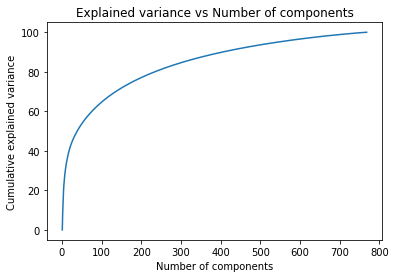

num_comp: 543


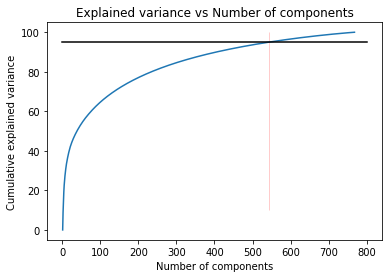

In [ ]:
pca = pcaFeature(X)

In [ ]:
pca_train = pca.transform(X)

In [ ]:
pca_train.shape

(50001, 543)

In [ ]:
torch.save(pca_train,'./dataset/pca_train.pth')

In [ ]:
X = torch.load('./dataset/test_des.pth')
pca_test = pca.transform(X)
torch.save(pca_test,'./dataset/pca_test.pth')

In [ ]:
pca_test.shape

(15120, 543)